<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [4]:
import pandas as pd
data = 'https://raw.githubusercontent.com/mkirby1995/NLP/master/State_of_Unions.json'
df = pd.read_json(data)
df = df.sort_values(by = ['year'])

df.head()

,president,year,content
125,Washington,1790,
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...


In [8]:
import re
def tokenize(text):
    sample = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = sample.lower().split()
    
    return tokens

In [9]:
df['tokens'] = df['content'].apply(tokenize)

In [11]:
df['tokens'].head()

125                                                   []
127    [fellowcitizens, of, the, senate, and, house, ...
138    [fellowcitizens, of, the, senate, and, house, ...
136    [fellowcitizens, of, the, senate, and, house, ...
163    [fellowcitizens, of, the, senate, and, house, ...
Name: tokens, dtype: object

In [12]:
from collections import Counter

word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)


[('the', 122318),
 ('of', 84846),
 ('to', 53162),
 ('and', 51211),
 ('in', 32786),
 ('a', 23880),
 ('that', 18637),
 ('for', 16165),
 ('be', 15968),
 ('is', 14893)]

In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(df['tokens'])

In [15]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
245,the,227,122318,1.0,0.076122,0.076122,0.995614
5,of,227,84846,2.0,0.052802,0.128924,0.995614
638,to,227,53162,3.0,0.033084,0.162008,0.995614
573,and,227,51211,4.0,0.031870,0.193878,0.995614
402,in,227,32786,5.0,0.020404,0.214282,0.995614


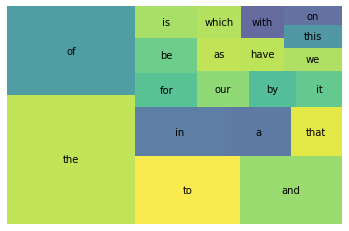

In [18]:
import seaborn as sns
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

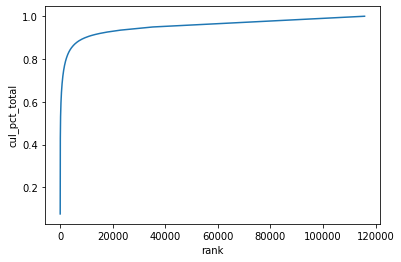

In [19]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [23]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)
tokens = []

for doc in tokenizer.pipe(df['content'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [24]:
df['tokens'].head()

125                                                   []
127    [fellow-citizens, senate, house, representativ...
138    [fellow-citizens, senate, house, representativ...
136    [fellow-citizens, senate, house, representativ...
163    [fellow-citizens, senate, house, representativ...
Name: tokens, dtype: object

In [25]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
471,\n,227,135374,1.0,0.140330,0.140330,0.995614
600,\n\n,227,20904,2.0,0.021669,0.162000,0.995614
713,government,223,5134,3.0,0.005322,0.167322,0.978070
405,united,226,4774,4.0,0.004949,0.172271,0.991228
16,states,225,4457,5.0,0.004620,0.176891,0.986842


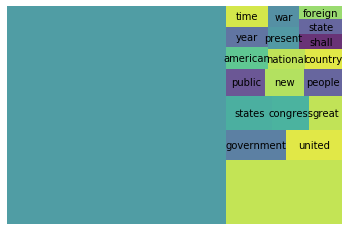

In [26]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [35]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\n', '\n\n', 'The', 'I',])

In [36]:
tokens = []

for doc in tokenizer.pipe(df['content'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [37]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
728,government,223,5134,1.0,0.006056,0.006056,0.978070
413,united,226,4774,2.0,0.005631,0.011686,0.991228
16,states,225,4457,3.0,0.005257,0.016943,0.986842
254,it,226,3991,4.0,0.004707,0.021651,0.991228
854,congress,225,3611,5.0,0.004259,0.025910,0.986842


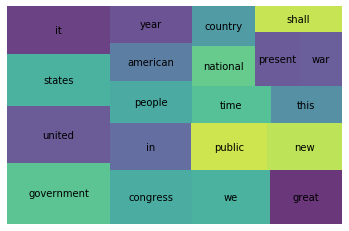

In [38]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

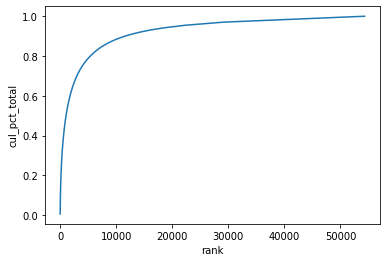

In [39]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)